# **Course Name: Advances in Data Science and Architechture**

### Submitted by: Team 01
#### Name - Nuid
* Nikita Gaurihar - 002980962
* Ronak Bhushan Patil - 001007035
* Anshuman Karan - 001091491
* Aishwarya Ghaytadak - 001568096
___________________________________________________________________________
 
## **Final Project** - Sentiment Analysis using Twitter Data


### **Abstract** 

* With the rapidly changing technologies, social media platforms like Facebook, Instagram, Twitter, etc. are becoming the power sources for Data Scientists and Researchers. Nowadays, data has become an important aspect of running any business as it helps organisations to take data driven decisions through responsive insights. Thus, in this project, we aim to predict the sentiments of the user that has tweeted on the Twitter platform in the recent period regarding the topic - "Ukraine-Russia war". 


* The detailed flow of this project is mentioned below - 
    1. Data Scrapping from Twitter
    2. Data Concatenation
    3. Exploratory Data Analysis and Data Cleaning
    4. Data Visualisation
    5. Prediction through Data Modeling

# A. Importing libraries and packages

In [ ]:
# importing libraries and packages
# plotting
import seaborn as sns
#from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

# nltk
#from nltk.stem import WordNetLemmatizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

import pandas as pd
import numpy as np
import re
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# B. Uploading all the data files that we recently scrapped from twitter:

### 1. Data file contains tweets with #UkraineRussiaWar

In [ ]:
tweet_dataset1 = pd.read_csv('Ukraine_First_Extract.csv')
tweet_dataset1

,Datetime,Tweet Id,Text,Username,Like Count,Display Name,Language
0,2022-04-24 23:59:08+00:00,1.518380e+18,#Ukraine #UkraineRussiaWar #UkraineRussianWar ...,Ramin_Kondori,0,Ramin Kondori,und
1,2022-04-24 23:59:04+00:00,1.518380e+18,Please support my mom on YouTube: \nhttps://...,MasterTuxedo,1,AlexInATuxedo,en
2,2022-04-24 23:58:45+00:00,1.518380e+18,Please support my mom on YouTube: \nhttps://...,AlexInATuxedo,2,MyHangoutArea,en
3,2022-04-24 23:56:47+00:00,1.518380e+18,#Dombass: discussion of #Ukraine situation \n#...,pyrrhophytes41,1,Alfred,en
4,2022-04-24 23:56:02+00:00,1.518380e+18,"Ite Pedicabo te ipsum, Putin!\n(Latin)\n\n#Rus...",FuckPutinBot,0,Fuck Putin Bot - #StandWithUkraine 🇺🇦,en
...,...,...,...,...,...,...,...
99996,2022-04-04 18:13:00+00:00,1.511040e+18,#40dayofwar \n\nThank you for this decision!\n...,BlogUkraine,4,Blog about the war for free Ukraine 🇺🇦,en
99997,2022-04-04 18:12:58+00:00,1.511040e+18,"The #Ukrainian foreign minister, Dmytro Kuleba...",RoINTEL,1,RoINTEL,en
99998,2022-04-04 18:12:54+00:00,1.511040e+18,Les grands distributeurs qui nourrisse les fra...,vitrolles13127,0,jean-bernard 🏳️‍🌈♂️,fr
99999,2022-04-04 18:12:49+00:00,1.511040e+18,#ukraine #russie #UkraineRussiaWar \nATTAQUE ...,Damien94475559,0,𝔻𝕒𝕞𝕚𝕤𝕙 𝔸𝕔𝕥𝕦 𝔾é𝕠𝕡𝕠𝕝𝕚𝕥𝕚𝕢𝕦𝕖,fr


### 2. Data file contains tweets with #HopeForUkraine

In [ ]:
tweet_dataset2 = pd.read_csv ('HopeForUkraine.csv')
tweet_dataset2

,Datetime,Tweet Id,Text,Username,Like Count,Display Name,Language
0,2022-04-27 23:58:25+00:00,1.519470e+18,#SaveMariupolNow #SaveMariupol #EXTRACTION,Avgreyd1,0,Ed One,und
1,2022-04-27 23:58:22+00:00,1.519470e+18,#SaveMariupol https://t.co/41OUEobKkz,PinkyMinky3,1,Ginna Keulen 🆘 🇺🇦,und
2,2022-04-27 23:56:49+00:00,1.519470e+18,#MariupolNow #Mariupol #AzovstaI #SaveMariupol...,Europaetal,1,Atlantia,und
3,2022-04-27 23:56:09+00:00,1.519470e+18,日本の市民は行動しよう\nここまでのところ日本の市民が問題でもっともおとなしいと思う\n大使...,democracy_sakai,0,坂井 正明 Masaaki SAKAI,ja
4,2022-04-27 23:53:51+00:00,1.519460e+18,Heartbreaking account by a #Mariupol doctor. “...,David97780292,0,David,en
...,...,...,...,...,...,...,...
1997,2022-03-06 16:39:19+00:00,1.500510e+18,@OfficialSting @RamiroBelgardt Many songs from...,DuckPandemic,3,Ducked up World,en
1998,2022-03-06 16:38:17+00:00,1.500510e+18,@AponteGaupp That same song popped into my hea...,DuckPandemic,1,Ducked up World,en
1999,2022-03-06 16:33:13+00:00,1.500510e+18,This evening we will be streaming in support o...,discoduck99,9,Discoduck99,en
2000,2022-03-06 16:27:54+00:00,1.500510e+18,Kuka tuntee henkilökohtaisesti Venäjän ortodok...,HOPE_Realizer,0,Meinolf Löseke,fi


### 3. Data file contains tweets with #SaveMariupol

In [ ]:
tweet_dataset3 = pd.read_csv ('savemariupol.csv')
tweet_dataset3

,Datetime,Tweet Id,Text,Username,Like Count,Display Name,Language
0,2022-04-27 23:58:25+00:00,1.520000e+18,#SaveMariupolNow #SaveMariupol #EXTRACTION,Avgreyd1,0,Ed One,und
1,2022-04-27 23:58:22+00:00,1.520000e+18,#SaveMariupol https://t.co/41OUEobKkz,PinkyMinky3,1,Ginna Keulen 🆘 🇺🇦,und
2,2022-04-27 23:56:49+00:00,1.520000e+18,#MariupolNow #Mariupol #AzovstaI #SaveMariupol...,Europaetal,1,Atlantia,und
3,2022-04-27 23:56:09+00:00,1.520000e+18,日本の市民は行動しよう\nここまでのところ日本の市民が問題でもっともおとなしいと思う\n大使...,democracy_sakai,0,坂井 正明 Masaaki SAKAI,ja
4,2022-04-27 23:53:51+00:00,1.520000e+18,Heartbreaking account by a #Mariupol doctor. “...,David97780292,0,David,en
...,...,...,...,...,...,...,...
996,2022-04-26 17:33:24+00:00,1.520000e+18,#SaveMariupol #SaveUkraine #PutinWarCriminal h...,kmotrMP,0,Marek🕴,und
997,2022-04-26 17:33:20+00:00,1.520000e+18,#SaveMariupol #SaveUkraine #StandWithUkraine h...,MikaZ26,0,Mika.Z,und
998,2022-04-26 17:32:21+00:00,1.520000e+18,#NotOnlyPutin\n#StandWithUkraine #SaveUkraine ...,bandermachine,0,BanderMachine,und
999,2022-04-26 17:32:20+00:00,1.520000e+18,Ukraine agrees that humanitarian corridors are...,sosmaydan,3,Євромайдан SOS,en


### 4. Data file contains tweets with #StandWithUkraine

In [ ]:
tweet_dataset4 = pd.read_csv ('StandWithUkraine.csv')
tweet_dataset4

,Datetime,Tweet Id,Text,Username,Like Count,Display Name,Language
0,2022-04-27 23:59:43+00:00,1.520000e+18,A new Ukrainian version of Austrian artist Gus...,Wildmoonsister,1,Robin Pierce,en
1,2022-04-27 23:59:24+00:00,1.520000e+18,#StandWithUkraine \n#SlavaUkraini \n#UkraineEU...,BlnBiker,0,Berlin Biker 🇦🇫 🇺🇦,und
2,2022-04-27 23:59:00+00:00,1.520000e+18,💔\n#StandUpForUkraine\n#StandWithUkraine🇺🇦🌻 ht...,polarbear_2017,0,polarbear,und
3,2022-04-27 23:58:42+00:00,1.520000e+18,"🇷🇺claims that it ""evacuated"" more than 1 milli...",YGorodnichenko,21,Yuriy Gorodnichenko,und
4,2022-04-27 23:58:34+00:00,1.520000e+18,@DefenceU #StandWithUkraine,Julian91911,0,Julian 🇺🇦 I stand with Ukraine! 🇺🇦,und
...,...,...,...,...,...,...,...
996,2022-04-27 19:57:16+00:00,1.520000e+18,"It's spring, and it's a little sad, that it's ...",uarmy_bts,8,ᴮᴱ BTS Ukraine⁷,en
997,2022-04-27 19:57:15+00:00,1.520000e+18,"Die #Ukraine sagt, #Russland will den Krieg.\n...",okiitora,0,大きい虎 Okiitora,de
998,2022-04-27 19:57:02+00:00,1.520000e+18,"Fick dich, Putin!\n(German)\n\n#StopPutin #Ukr...",FuckPutinBot,0,Fuck Putin Bot - #StandWithUkraine 🇺🇦,en
999,2022-04-27 19:56:46+00:00,1.520000e+18,And they will keep doing it till the very Vict...,kleerofski_c,1,AlienPls 🇬🇧🇨🇦,en


### 5. Data file contains tweets with #SupportUkraine

In [ ]:
tweet_dataset5 = pd.read_csv ('SupportUkraine.csv')
tweet_dataset5

,Datetime,Tweet Id,Text,Username,Like Count,Display Name,Language
0,2022-04-27 23:58:05+00:00,1.519470e+18,Some more photos of Saint Javelin by the amazi...,SupportUA_art,9,SupportUkraine.art - all profits go to Ukraine,en
1,2022-04-27 23:52:00+00:00,1.519460e+18,How the #Ukrainian Armed Forces destroy the oc...,VigilantinfoN,3,Vigilant News,en
2,2022-04-27 23:46:35+00:00,1.519460e+18,"The United States is telling allies to ""move e...",HubuNews,0,Hubu.news,en
3,2022-04-27 23:29:42+00:00,1.519460e+18,"1/4. Любі мої, якщо між квитком на концерт цьо...",Sofsofsofka,0,"Sofi, a? 🇺🇦",uk
4,2022-04-27 22:58:24+00:00,1.519450e+18,@KyivIndependent #StandWithUkraine #SupportUkr...,phyllisa99998,0,PhyllisA,und
...,...,...,...,...,...,...,...
996,2022-04-25 22:54:34+00:00,1.518730e+18,Be on the right side of history.\n\nBądź po wł...,JolantaRom,1,Jolanta Rom,und
997,2022-04-25 22:54:10+00:00,1.518730e+18,@ElBeardsley @joannakakissis #SaveMariupolDonb...,ElkeHollings,0,HollingsElke🇺🇸,und
998,2022-04-25 22:53:44+00:00,1.518720e+18,@ukraine_world 🤬🤬🤬🤬#SaveMariupolDonbasAndAzov\...,ElkeHollings,1,HollingsElke🇺🇸,und
999,2022-04-25 22:53:12+00:00,1.518720e+18,@kajakallas #SaveMariupolDonbasAndAzov\n#SendU...,ElkeHollings,2,HollingsElke🇺🇸,und


### 6. Data file contains tweets with #UkraineRussiaWar

In [ ]:
tweet_dataset6 = pd.read_csv ('UkraineRussiaWar.csv')
tweet_dataset6

,Datetime,Tweet Id,Text,Username,Like Count,Display Name,Language
0,2022-04-24 23:53:00+00:00,1.520000e+18,That's exactly what I expected from Malaysia.....,NylaMLBB,1,Nyla ML,en
1,2022-04-24 23:50:33+00:00,1.520000e+18,Masumiyet savaşta herkesten önce ölür...\n\n#U...,DDGrubu,16,Derin Düşünce .Org,tr
2,2022-04-24 23:49:13+00:00,1.520000e+18,Donanması bile olmayan Ukrayna ile bir kara sa...,DDGrubu,64,Derin Düşünce .Org,tr
3,2022-04-24 23:32:03+00:00,1.520000e+18,"Gå fuck dig selv, Putin!\n(Danish)\n\n#StandWi...",FuckPutinBot,0,Fuck Putin Bot - #StandWithUkraine 🇺🇦,da
4,2022-04-24 23:30:02+00:00,1.520000e+18,"Iet Fuck sevi, Putins!\n(Latvian)\n\n#StopPuti...",FuckPutinBot,0,Fuck Putin Bot - #StandWithUkraine 🇺🇦,lv
...,...,...,...,...,...,...,...
58267,2022-04-26 16:34:28+00:00,1.520000e+18,In 5-10 years russian aggression can strike ag...,Gerashchenko_en,575,Anton Gerashchenko,en
58268,2022-04-26 16:34:02+00:00,1.520000e+18,"Idź się pieprzyć, Putin!\n(Polish)\n\n#FuckPut...",FuckPutinBot,0,Fuck Putin Bot - #StandWithUkraine 🇺🇦,pl
58269,2022-04-26 16:24:32+00:00,1.520000e+18,Join us this time next week (6pm BST 3/5/22) a...,QMUL_HSS,4,Queen Mary Faculty of Humanities & Social Scie...,en
58270,2022-04-26 16:22:15+00:00,1.520000e+18,This is what a freedom mandate looks like. Thi...,GusWatanabe,4,Gus Watanabe (he/his),en


### 7. Data file contains tweets with #zelensky

In [ ]:
tweet_dataset7 = pd.read_csv ('zelensky.csv')
tweet_dataset7

,Datetime,Tweet Id,Text,Username,Like Count,Display Name,Language
0,2022-04-27 23:58:25+00:00,1.520000e+18,#SaveMariupolNow #SaveMariupol #EXTRACTION,Avgreyd1,0,Ed One,und
1,2022-04-27 23:58:22+00:00,1.520000e+18,#SaveMariupol https://t.co/41OUEobKkz,PinkyMinky3,1,Ginna Keulen 🆘 🇺🇦,und
2,2022-04-27 23:56:49+00:00,1.520000e+18,#MariupolNow #Mariupol #AzovstaI #SaveMariupol...,Europaetal,1,Atlantia,und
3,2022-04-27 23:56:09+00:00,1.520000e+18,日本の市民は行動しよう\nここまでのところ日本の市民が問題でもっともおとなしいと思う\n大使...,democracy_sakai,0,坂井 正明 Masaaki SAKAI,ja
4,2022-04-27 23:53:51+00:00,1.520000e+18,Heartbreaking account by a #Mariupol doctor. “...,David97780292,0,David,en
...,...,...,...,...,...,...,...
996,2022-04-26 17:33:24+00:00,1.520000e+18,#SaveMariupol #SaveUkraine #PutinWarCriminal h...,kmotrMP,0,Marek🕴,und
997,2022-04-26 17:33:20+00:00,1.520000e+18,#SaveMariupol #SaveUkraine #StandWithUkraine h...,MikaZ26,0,Mika.Z,und
998,2022-04-26 17:32:21+00:00,1.520000e+18,#NotOnlyPutin\n#StandWithUkraine #SaveUkraine ...,bandermachine,0,BanderMachine,und
999,2022-04-26 17:32:20+00:00,1.520000e+18,Ukraine agrees that humanitarian corridors are...,sosmaydan,3,Євромайдан SOS,en


### Here, we collated all the files in single file

In [ ]:
Tweets_Final = pd.concat([tweet_dataset1,tweet_dataset2,tweet_dataset3,tweet_dataset4,tweet_dataset5,tweet_dataset6,tweet_dataset7])
Tweets_Final

,Datetime,Tweet Id,Text,Username,Like Count,Display Name,Language
0,2022-04-24 23:59:08+00:00,1.518380e+18,#Ukraine #UkraineRussiaWar #UkraineRussianWar ...,Ramin_Kondori,0,Ramin Kondori,und
1,2022-04-24 23:59:04+00:00,1.518380e+18,Please support my mom on YouTube: \nhttps://...,MasterTuxedo,1,AlexInATuxedo,en
2,2022-04-24 23:58:45+00:00,1.518380e+18,Please support my mom on YouTube: \nhttps://...,AlexInATuxedo,2,MyHangoutArea,en
3,2022-04-24 23:56:47+00:00,1.518380e+18,#Dombass: discussion of #Ukraine situation \n#...,pyrrhophytes41,1,Alfred,en
4,2022-04-24 23:56:02+00:00,1.518380e+18,"Ite Pedicabo te ipsum, Putin!\n(Latin)\n\n#Rus...",FuckPutinBot,0,Fuck Putin Bot - #StandWithUkraine 🇺🇦,en
...,...,...,...,...,...,...,...
996,2022-04-26 17:33:24+00:00,1.520000e+18,#SaveMariupol #SaveUkraine #PutinWarCriminal h...,kmotrMP,0,Marek🕴,und
997,2022-04-26 17:33:20+00:00,1.520000e+18,#SaveMariupol #SaveUkraine #StandWithUkraine h...,MikaZ26,0,Mika.Z,und
998,2022-04-26 17:32:21+00:00,1.520000e+18,#NotOnlyPutin\n#StandWithUkraine #SaveUkraine ...,bandermachine,0,BanderMachine,und
999,2022-04-26 17:32:20+00:00,1.520000e+18,Ukraine agrees that humanitarian corridors are...,sosmaydan,3,Євромайдан SOS,en


# D. Filtered out tweets that were in English language

In [ ]:
Tweets_Final = Tweets_Final[Tweets_Final['Language']=='en']

In [ ]:
Tweets_Final.shape

(98432, 7)

In [ ]:
# dropping first column
Tweets_Final.reset_index(drop=True)

,Datetime,Tweet Id,Text,Username,Like Count,Display Name,Language
0,2022-04-24 23:59:04+00:00,1.518380e+18,Please support my mom on YouTube: \nhttps://...,MasterTuxedo,1,AlexInATuxedo,en
1,2022-04-24 23:58:45+00:00,1.518380e+18,Please support my mom on YouTube: \nhttps://...,AlexInATuxedo,2,MyHangoutArea,en
2,2022-04-24 23:56:47+00:00,1.518380e+18,#Dombass: discussion of #Ukraine situation \n#...,pyrrhophytes41,1,Alfred,en
3,2022-04-24 23:56:02+00:00,1.518380e+18,"Ite Pedicabo te ipsum, Putin!\n(Latin)\n\n#Rus...",FuckPutinBot,0,Fuck Putin Bot - #StandWithUkraine 🇺🇦,en
4,2022-04-24 23:55:55+00:00,1.518380e+18,Russia's consolidation and gradual advance sou...,WorldBreakingN9,1,World conflicts Monitoring Center,en
...,...,...,...,...,...,...,...
98427,2022-04-26 17:47:30+00:00,1.520000e+18,I just can't find words to express how I feel\...,MarijusPetruson,0,Marijus Petrušonis,en
98428,2022-04-26 17:41:36+00:00,1.520000e+18,"Looks like WWII photo. Yes it’s a city of 430,...",anastasiia_lenn,1,Aanastasiia Lenna,en
98429,2022-04-26 17:38:18+00:00,1.520000e+18,"#SaveMariupol || Btw, I saw two Ukraine kids a...",stlplace,1,mxu (he/him/his),en
98430,2022-04-26 17:32:20+00:00,1.520000e+18,Ukraine agrees that humanitarian corridors are...,sosmaydan,3,Євромайдан SOS,en


# E. Exporting data in CSV File from dataframe:

In [ ]:
Tweets_Final.head()
Tweets_Final.to_csv('Tweets_Concat.csv')

# F. Exploratory Data Analysis

In [ ]:
Tweets_Final.shape

(98432, 7)

### **Interpretation:** Our dataset contains total 98432 records with 7 attributes.

In [ ]:
Tweets_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98432 entries, 1 to 1000
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Datetime      98432 non-null  object 
 1   Tweet Id      98432 non-null  float64
 2   Text          98432 non-null  object 
 3   Username      98432 non-null  object 
 4   Like Count    98432 non-null  int64  
 5   Display Name  98423 non-null  object 
 6   Language      98432 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 6.0+ MB


### **Interpretation:** The information with respect to the datatype of each attribute is mentioned here

In [ ]:
Tweets_Final.describe()

,Tweet Id,Like Count
count,9.843200e+04,98432.000000
mean,1.513611e+18,13.039713
std,3.428519e+15,265.660824
min,1.500510e+18,0.000000
25%,1.510000e+18,0.000000
50%,1.513260e+18,1.000000
75%,1.516390e+18,2.000000
max,1.520000e+18,41120.000000


### **Interpretation:** This gives the statistical information about our data.

In [ ]:
Tweets_Final.nunique()

Datetime        89869
Tweet Id         1239
Text            91886
Username        27254
Like Count        738
Display Name    26708
Language            1
dtype: int64

### **Interpretation:** This shows how many unique values each column have.

In [ ]:
Tweets_Final.isna().sum()

Datetime        0
Tweet Id        0
Text            0
Username        0
Like Count      0
Display Name    9
Language        0
dtype: int64

### **Interpretation:** 
* This is used to check if our data has any null values.
* However, the above results show that there are total 9 null values in the "Display Name" column .

In [ ]:
Tweets_Final = Tweets_Final.dropna()

### **Interpretation:** We have dropped those records that had 9 null values as such a small data wont affect our analysis.

In [ ]:
Tweets_Final.isna().sum()

Datetime        0
Tweet Id        0
Text            0
Username        0
Like Count      0
Display Name    0
Language        0
dtype: int64

# G. Data Preprocessing

### **Interpretation:**
* The Tweets that we scrapped from Twitter had URLs and Youtube links. To remove those links, we have defined the following function with the help of 'Regex'.
* Further, we have added the URL free text in the new column - "Text_Clear".

In [ ]:
def remove_URL(Tweets_Final):
    """Remove URLs from a sample string"""
    return re.sub(r'https?://\S+', '', Tweets_Final)

In [ ]:
Tweets_Final['Text_Clear'] = Tweets_Final['Text'].apply(lambda row: remove_URL(row))

In [ ]:
Tweets_Final

,Datetime,Tweet Id,Text,Username,Like Count,Display Name,Language,Text_Clear
1,2022-04-24 23:59:04+00:00,1.518380e+18,Please support my mom on YouTube: \nhttps://...,MasterTuxedo,1,AlexInATuxedo,en,Please support my mom on YouTube: \n\n\n#Ukr...
2,2022-04-24 23:58:45+00:00,1.518380e+18,Please support my mom on YouTube: \nhttps://...,AlexInATuxedo,2,MyHangoutArea,en,Please support my mom on YouTube: \n\n\n#Ukr...
3,2022-04-24 23:56:47+00:00,1.518380e+18,#Dombass: discussion of #Ukraine situation \n#...,pyrrhophytes41,1,Alfred,en,#Dombass: discussion of #Ukraine situation \n#...
4,2022-04-24 23:56:02+00:00,1.518380e+18,"Ite Pedicabo te ipsum, Putin!\n(Latin)\n\n#Rus...",FuckPutinBot,0,Fuck Putin Bot - #StandWithUkraine 🇺🇦,en,"Ite Pedicabo te ipsum, Putin!\n(Latin)\n\n#Rus..."
5,2022-04-24 23:55:55+00:00,1.518380e+18,Russia's consolidation and gradual advance sou...,WorldBreakingN9,1,World conflicts Monitoring Center,en,Russia's consolidation and gradual advance sou...
...,...,...,...,...,...,...,...,...
983,2022-04-26 17:47:30+00:00,1.520000e+18,I just can't find words to express how I feel\...,MarijusPetruson,0,Marijus Petrušonis,en,I just can't find words to express how I feel\...
987,2022-04-26 17:41:36+00:00,1.520000e+18,"Looks like WWII photo. Yes it’s a city of 430,...",anastasiia_lenn,1,Aanastasiia Lenna,en,"Looks like WWII photo. Yes it’s a city of 430,..."
992,2022-04-26 17:38:18+00:00,1.520000e+18,"#SaveMariupol || Btw, I saw two Ukraine kids a...",stlplace,1,mxu (he/him/his),en,"#SaveMariupol || Btw, I saw two Ukraine kids a..."
999,2022-04-26 17:32:20+00:00,1.520000e+18,Ukraine agrees that humanitarian corridors are...,sosmaydan,3,Євромайдан SOS,en,Ukraine agrees that humanitarian corridors are...


### **Interpretation:**
* Here, we are converting the our text data in the lower case form.
* The converted data is then saved in the new column- "Text_Lower".

In [ ]:
#All LowerCase
Tweets_Final['Text_Lower'] = Tweets_Final['Text_Clear'] .apply(lambda x: " ".join(x.lower() for x in x.split()))
Tweets_Final.head()

,Datetime,Tweet Id,Text,Username,Like Count,Display Name,Language,Text_Clear,Text_Lower
1,2022-04-24 23:59:04+00:00,1.518380e+18,Please support my mom on YouTube: \nhttps://...,MasterTuxedo,1,AlexInATuxedo,en,Please support my mom on YouTube: \n\n\n#Ukr...,please support my mom on youtube: #ukraine #uk...
2,2022-04-24 23:58:45+00:00,1.518380e+18,Please support my mom on YouTube: \nhttps://...,AlexInATuxedo,2,MyHangoutArea,en,Please support my mom on YouTube: \n\n\n#Ukr...,please support my mom on youtube: #ukraine #uk...
3,2022-04-24 23:56:47+00:00,1.518380e+18,#Dombass: discussion of #Ukraine situation \n#...,pyrrhophytes41,1,Alfred,en,#Dombass: discussion of #Ukraine situation \n#...,#dombass: discussion of #ukraine situation #ru...
4,2022-04-24 23:56:02+00:00,1.518380e+18,"Ite Pedicabo te ipsum, Putin!\n(Latin)\n\n#Rus...",FuckPutinBot,0,Fuck Putin Bot - #StandWithUkraine 🇺🇦,en,"Ite Pedicabo te ipsum, Putin!\n(Latin)\n\n#Rus...","ite pedicabo te ipsum, putin! (latin) #russiai..."
5,2022-04-24 23:55:55+00:00,1.518380e+18,Russia's consolidation and gradual advance sou...,WorldBreakingN9,1,World conflicts Monitoring Center,en,Russia's consolidation and gradual advance sou...,russia's consolidation and gradual advance sou...


### **Interpretation:**
* Here, we are removing the symbols and punctuation marks from our lower case converted data.
* Then the data is saved in the new column- "Text_punctuation".

In [ ]:
#Removing Punctuation
Tweets_Final['Text_punctuation'] = Tweets_Final['Text_Lower'].str.replace('[^\w\s]','')
Tweets_Final.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



,Datetime,Tweet Id,Text,Username,Like Count,Display Name,Language,Text_Clear,Text_Lower,Text_punctuation
1,2022-04-24 23:59:04+00:00,1.518380e+18,Please support my mom on YouTube: \nhttps://...,MasterTuxedo,1,AlexInATuxedo,en,Please support my mom on YouTube: \n\n\n#Ukr...,please support my mom on youtube: #ukraine #uk...,please support my mom on youtube ukraine ukrai...
2,2022-04-24 23:58:45+00:00,1.518380e+18,Please support my mom on YouTube: \nhttps://...,AlexInATuxedo,2,MyHangoutArea,en,Please support my mom on YouTube: \n\n\n#Ukr...,please support my mom on youtube: #ukraine #uk...,please support my mom on youtube ukraine ukrai...
3,2022-04-24 23:56:47+00:00,1.518380e+18,#Dombass: discussion of #Ukraine situation \n#...,pyrrhophytes41,1,Alfred,en,#Dombass: discussion of #Ukraine situation \n#...,#dombass: discussion of #ukraine situation #ru...,dombass discussion of ukraine situation russia...
4,2022-04-24 23:56:02+00:00,1.518380e+18,"Ite Pedicabo te ipsum, Putin!\n(Latin)\n\n#Rus...",FuckPutinBot,0,Fuck Putin Bot - #StandWithUkraine 🇺🇦,en,"Ite Pedicabo te ipsum, Putin!\n(Latin)\n\n#Rus...","ite pedicabo te ipsum, putin! (latin) #russiai...",ite pedicabo te ipsum putin latin russiainvade...
5,2022-04-24 23:55:55+00:00,1.518380e+18,Russia's consolidation and gradual advance sou...,WorldBreakingN9,1,World conflicts Monitoring Center,en,Russia's consolidation and gradual advance sou...,russia's consolidation and gradual advance sou...,russias consolidation and gradual advance sout...


### **Interpretation:**
* Here, we are removing the stop words from the punctuation-free data.
* Then the data is saved in the new column- "Text_stop".

In [ ]:
#Removal of stop words

nltk.download('stopwords')
stop_List = ['Russia','Ukraine','english','ukrainerussiawar','ukraineunderattack','ukraine','ukrainewar','russia','war','ukranian','russian','ukrainerussianwar']
STOPWORDS = set(stop_List)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

Tweets_Final['Text_stop'] = Tweets_Final['Text_punctuation'].apply(lambda text: cleaning_stopwords(text))
Tweets_Final['Text_stop'].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1    please support my mom on youtube ukrainian ukr...
2    please support my mom on youtube ukrainian ukr...
3    dombass discussion of situation artillery poun...
4    ite pedicabo te ipsum putin latin russiainvade...
5    russias consolidation and gradual advance sout...
Name: Text_stop, dtype: object

In [ ]:
Tweets_Final.head()

,Datetime,Tweet Id,Text,Username,Like Count,Display Name,Language,Text_Clear,Text_Lower,Text_punctuation,Text_stop
1,2022-04-24 23:59:04+00:00,1.518380e+18,Please support my mom on YouTube: \nhttps://...,MasterTuxedo,1,AlexInATuxedo,en,Please support my mom on YouTube: \n\n\n#Ukr...,please support my mom on youtube: #ukraine #uk...,please support my mom on youtube ukraine ukrai...,please support my mom on youtube ukrainian ukr...
2,2022-04-24 23:58:45+00:00,1.518380e+18,Please support my mom on YouTube: \nhttps://...,AlexInATuxedo,2,MyHangoutArea,en,Please support my mom on YouTube: \n\n\n#Ukr...,please support my mom on youtube: #ukraine #uk...,please support my mom on youtube ukraine ukrai...,please support my mom on youtube ukrainian ukr...
3,2022-04-24 23:56:47+00:00,1.518380e+18,#Dombass: discussion of #Ukraine situation \n#...,pyrrhophytes41,1,Alfred,en,#Dombass: discussion of #Ukraine situation \n#...,#dombass: discussion of #ukraine situation #ru...,dombass discussion of ukraine situation russia...,dombass discussion of situation artillery poun...
4,2022-04-24 23:56:02+00:00,1.518380e+18,"Ite Pedicabo te ipsum, Putin!\n(Latin)\n\n#Rus...",FuckPutinBot,0,Fuck Putin Bot - #StandWithUkraine 🇺🇦,en,"Ite Pedicabo te ipsum, Putin!\n(Latin)\n\n#Rus...","ite pedicabo te ipsum, putin! (latin) #russiai...",ite pedicabo te ipsum putin latin russiainvade...,ite pedicabo te ipsum putin latin russiainvade...
5,2022-04-24 23:55:55+00:00,1.518380e+18,Russia's consolidation and gradual advance sou...,WorldBreakingN9,1,World conflicts Monitoring Center,en,Russia's consolidation and gradual advance sou...,russia's consolidation and gradual advance sou...,russias consolidation and gradual advance sout...,russias consolidation and gradual advance sout...


### **Interpretation:**
* Further the data is tokenised, i.e., the sentences are split into comma seperated words and saved them in the list form.
* Then the data is saved in the new column- "Text_tokenized".

In [ ]:
#Tokenization of Tweets
import textblob           
from textblob import TextBlob

def tokenization(text):
    text = re.split('\W+', text)
    return text

Tweets_Final['Text_tokenized'] = Tweets_Final['Text_stop'].apply(lambda x: tokenization(x.lower()))
Tweets_Final[['Text', 'Text_Clear', 'Text_Lower', 'Text_punctuation', 'Text_stop', 'Text_tokenized']]

,Text,Text_Clear,Text_Lower,Text_punctuation,Text_stop,Text_tokenized
1,Please support my mom on YouTube: \nhttps://...,Please support my mom on YouTube: \n\n\n#Ukr...,please support my mom on youtube: #ukraine #uk...,please support my mom on youtube ukraine ukrai...,please support my mom on youtube ukrainian ukr...,"[please, support, my, mom, on, youtube, ukrain..."
2,Please support my mom on YouTube: \nhttps://...,Please support my mom on YouTube: \n\n\n#Ukr...,please support my mom on youtube: #ukraine #uk...,please support my mom on youtube ukraine ukrai...,please support my mom on youtube ukrainian ukr...,"[please, support, my, mom, on, youtube, ukrain..."
3,#Dombass: discussion of #Ukraine situation \n#...,#Dombass: discussion of #Ukraine situation \n#...,#dombass: discussion of #ukraine situation #ru...,dombass discussion of ukraine situation russia...,dombass discussion of situation artillery poun...,"[dombass, discussion, of, situation, artillery..."
4,"Ite Pedicabo te ipsum, Putin!\n(Latin)\n\n#Rus...","Ite Pedicabo te ipsum, Putin!\n(Latin)\n\n#Rus...","ite pedicabo te ipsum, putin! (latin) #russiai...",ite pedicabo te ipsum putin latin russiainvade...,ite pedicabo te ipsum putin latin russiainvade...,"[ite, pedicabo, te, ipsum, putin, latin, russi..."
5,Russia's consolidation and gradual advance sou...,Russia's consolidation and gradual advance sou...,russia's consolidation and gradual advance sou...,russias consolidation and gradual advance sout...,russias consolidation and gradual advance sout...,"[russias, consolidation, and, gradual, advance..."
...,...,...,...,...,...,...
983,I just can't find words to express how I feel\...,I just can't find words to express how I feel\...,i just can't find words to express how i feel ...,i just cant find words to express how i feel s...,i just cant find words to express how i feel s...,"[i, just, cant, find, words, to, express, how,..."
987,"Looks like WWII photo. Yes it’s a city of 430,...","Looks like WWII photo. Yes it’s a city of 430,...","looks like wwii photo. yes it’s a city of 430,...",looks like wwii photo yes its a city of 430000...,looks like wwii photo yes its a city of 430000...,"[looks, like, wwii, photo, yes, its, a, city, ..."
992,"#SaveMariupol || Btw, I saw two Ukraine kids a...","#SaveMariupol || Btw, I saw two Ukraine kids a...","#savemariupol || btw, i saw two ukraine kids a...",savemariupol btw i saw two ukraine kids at th...,savemariupol btw i saw two kids at the school ...,"[savemariupol, btw, i, saw, two, kids, at, the..."
999,Ukraine agrees that humanitarian corridors are...,Ukraine agrees that humanitarian corridors are...,ukraine agrees that humanitarian corridors are...,ukraine agrees that humanitarian corridors are...,agrees that humanitarian corridors are urgentl...,"[agrees, that, humanitarian, corridors, are, u..."


### **Interpretation:**
* Further the data is lemmetised, i.e., the  comma seperated words are converted in their true form.
* Then the data is saved in the new column- "Text_lemmatised".

In [ ]:
#Lemmatization is a more effective option than stemming because it converts the word into its root word,
#rather than just stripping the suffices.

nltk.download('wordnet')
wordNet = nltk.WordNetLemmatizer()
def lemmatizer(text):
    text = [wordNet.lemmatize(word) for word in text]
    return text

Tweets_Final['Text_lemmatized'] = Tweets_Final['Text_tokenized'].apply(lambda x: lemmatizer(x))
Tweets_Final[['Text', 'Text_Clear', 'Text_Lower', 'Text_punctuation', 'Text_stop', 'Text_tokenized','Text_lemmatized']][0:9]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Text,Text_Clear,Text_Lower,Text_punctuation,Text_stop,Text_tokenized,Text_lemmatized
1,Please support my mom on YouTube: \nhttps://...,Please support my mom on YouTube: \n\n\n#Ukr...,please support my mom on youtube: #ukraine #uk...,please support my mom on youtube ukraine ukrai...,please support my mom on youtube ukrainian ukr...,"[please, support, my, mom, on, youtube, ukrain...","[please, support, my, mom, on, youtube, ukrain..."
2,Please support my mom on YouTube: \nhttps://...,Please support my mom on YouTube: \n\n\n#Ukr...,please support my mom on youtube: #ukraine #uk...,please support my mom on youtube ukraine ukrai...,please support my mom on youtube ukrainian ukr...,"[please, support, my, mom, on, youtube, ukrain...","[please, support, my, mom, on, youtube, ukrain..."
3,#Dombass: discussion of #Ukraine situation \n#...,#Dombass: discussion of #Ukraine situation \n#...,#dombass: discussion of #ukraine situation #ru...,dombass discussion of ukraine situation russia...,dombass discussion of situation artillery poun...,"[dombass, discussion, of, situation, artillery...","[dombass, discussion, of, situation, artillery..."
4,"Ite Pedicabo te ipsum, Putin!\n(Latin)\n\n#Rus...","Ite Pedicabo te ipsum, Putin!\n(Latin)\n\n#Rus...","ite pedicabo te ipsum, putin! (latin) #russiai...",ite pedicabo te ipsum putin latin russiainvade...,ite pedicabo te ipsum putin latin russiainvade...,"[ite, pedicabo, te, ipsum, putin, latin, russi...","[ite, pedicabo, te, ipsum, putin, latin, russi..."
5,Russia's consolidation and gradual advance sou...,Russia's consolidation and gradual advance sou...,russia's consolidation and gradual advance sou...,russias consolidation and gradual advance sout...,russias consolidation and gradual advance sout...,"[russias, consolidation, and, gradual, advance...","[russia, consolidation, and, gradual, advance,..."
6,Arrival of rockets in #Lviv.\n#RUSSIA #Ukraine...,Arrival of rockets in #Lviv.\n#RUSSIA #Ukraine...,arrival of rockets in #lviv. #russia #ukraine ...,arrival of rockets in lviv russia ukraine russ...,arrival of rockets in lviv russiaukrainewar,"[arrival, of, rockets, in, lviv, russiaukraine...","[arrival, of, rocket, in, lviv, russiaukrainewar]"
7,This YouTuber either deserves a Bells or he wi...,This YouTuber either deserves a Bells or he wi...,this youtuber either deserves a bells or he wi...,this youtuber either deserves a bells or he wi...,this youtuber either deserves a bells or he wi...,"[this, youtuber, either, deserves, a, bells, o...","[this, youtuber, either, deserves, a, bell, or..."
10,This is delusional lol #UkraineRussiaWar #Ukra...,This is delusional lol #UkraineRussiaWar #Ukra...,this is delusional lol #ukrainerussiawar #ukra...,this is delusional lol ukrainerussiawar ukrain...,this is delusional lol russiaukrainewar,"[this, is, delusional, lol, russiaukrainewar]","[this, is, delusional, lol, russiaukrainewar]"
11,Some insight into how Ukrainian Nazis penetrat...,Some insight into how Ukrainian Nazis penetrat...,some insight into how ukrainian nazis penetrat...,some insight into how ukrainian nazis penetrat...,some insight into how ukrainian nazis penetrat...,"[some, insight, into, how, ukrainian, nazis, p...","[some, insight, into, how, ukrainian, nazi, pe..."


# H. Data Visualization

### 1. Word Cloud - This Visualisation shows the word cloud for the entire lemmatised data.

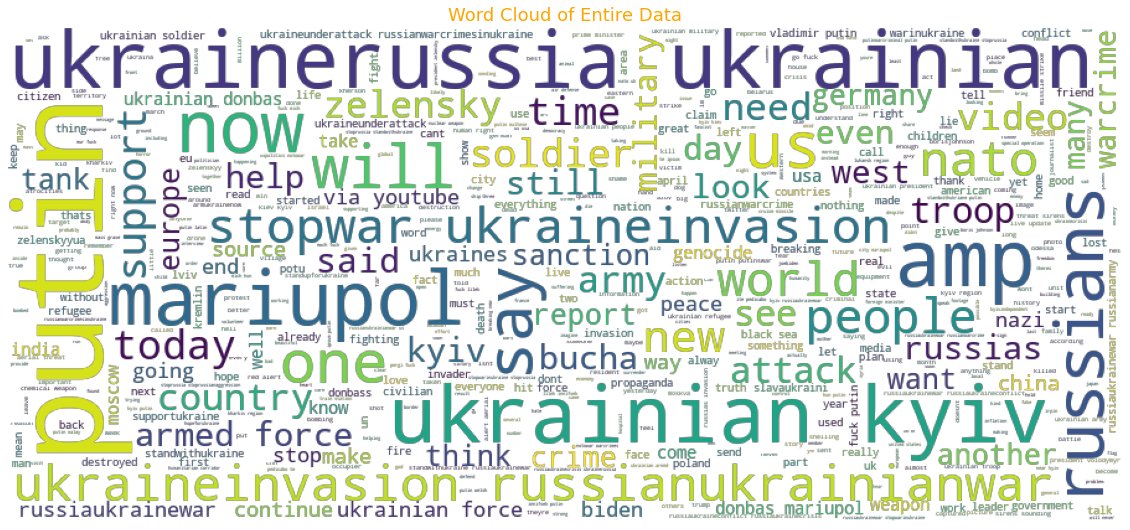

In [ ]:
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ' '.join(list(Tweets_Final['Text_stop'].values))
# Create a WordCloud object
wordcloud = WordCloud(mode="RGBA", background_color=None , max_words=1000, height = 400, width = 900, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()
plt.figure(figsize=(20,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud of Entire Data', fontsize=18, color = 'Orange')
plt.show()

In [ ]:
Tweets_Final.head()
Tweets_Final.to_csv('Tweets_lem.csv')

In [ ]:
Tweet_Final = pd.read_csv('/content/Tweets_lem.csv')
Tweet_Final

,Unnamed: 0,Datetime,Tweet Id,Text,Username,Like Count,Display Name,Language,Text_Clear,Text_Lower,Text_punctuation,Text_stop,Text_tokenized,Text_lemmatized
0,1,2022-04-24 23:59:04+00:00,1.51838e+18,Please support my mom on YouTube: \nhttps://...,MasterTuxedo,1,AlexInATuxedo,en,Please support my mom on YouTube: \n\n\n#Ukr...,please support my mom on youtube: #ukraine #uk...,please support my mom on youtube ukraine ukrai...,please support my mom on youtube ukrainian ukr...,"['please', 'support', 'my', 'mom', 'on', 'yout...","['please', 'support', 'my', 'mom', 'on', 'yout..."
1,2,2022-04-24 23:58:45+00:00,1.51838e+18,Please support my mom on YouTube: \nhttps://...,AlexInATuxedo,2,MyHangoutArea,en,Please support my mom on YouTube: \n\n\n#Ukr...,please support my mom on youtube: #ukraine #uk...,please support my mom on youtube ukraine ukrai...,please support my mom on youtube ukrainian ukr...,"['please', 'support', 'my', 'mom', 'on', 'yout...","['please', 'support', 'my', 'mom', 'on', 'yout..."
2,3,2022-04-24 23:56:47+00:00,1.51838e+18,#Dombass: discussion of #Ukraine situation \n#...,pyrrhophytes41,1,Alfred,en,#Dombass: discussion of #Ukraine situation \n#...,#dombass: discussion of #ukraine situation #ru...,dombass discussion of ukraine situation russia...,dombass discussion of situation artillery poun...,"['dombass', 'discussion', 'of', 'situation', '...","['dombass', 'discussion', 'of', 'situation', '..."
3,4,2022-04-24 23:56:02+00:00,1.51838e+18,"Ite Pedicabo te ipsum, Putin!\n(Latin)\n\n#Rus...",FuckPutinBot,0,Fuck Putin Bot - #StandWithUkraine 🇺🇦,en,"Ite Pedicabo te ipsum, Putin!\n(Latin)\n\n#Rus...","ite pedicabo te ipsum, putin! (latin) #russiai...",ite pedicabo te ipsum putin latin russiainvade...,ite pedicabo te ipsum putin latin russiainvade...,"['ite', 'pedicabo', 'te', 'ipsum', 'putin', 'l...","['ite', 'pedicabo', 'te', 'ipsum', 'putin', 'l..."
4,5,2022-04-24 23:55:55+00:00,1.51838e+18,Russia's consolidation and gradual advance sou...,WorldBreakingN9,1,World conflicts Monitoring Center,en,Russia's consolidation and gradual advance sou...,russia's consolidation and gradual advance sou...,russias consolidation and gradual advance sout...,russias consolidation and gradual advance sout...,"['russias', 'consolidation', 'and', 'gradual',...","['russia', 'consolidation', 'and', 'gradual', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98454,983,2022-04-26 17:47:30+00:00,1.52e+18,I just can't find words to express how I feel\...,MarijusPetruson,0,Marijus Petrušonis,en,I just can't find words to express how I feel\...,i just can't find words to express how i feel ...,i just cant find words to express how i feel s...,i just cant find words to express how i feel s...,"['i', 'just', 'cant', 'find', 'words', 'to', '...","['i', 'just', 'cant', 'find', 'word', 'to', 'e..."
98455,987,2022-04-26 17:41:36+00:00,1.52e+18,"Looks like WWII photo. Yes it’s a city of 430,...",anastasiia_lenn,1,Aanastasiia Lenna,en,"Looks like WWII photo. Yes it’s a city of 430,...","looks like wwii photo. yes it’s a city of 430,...",looks like wwii photo yes its a city of 430000...,looks like wwii photo yes its a city of 430000...,"['looks', 'like', 'wwii', 'photo', 'yes', 'its...","['look', 'like', 'wwii', 'photo', 'yes', 'it',..."
98456,992,2022-04-26 17:38:18+00:00,1.52e+18,"#SaveMariupol || Btw, I saw two Ukraine kids a...",stlplace,1,mxu (he/him/his),en,"#SaveMariupol || Btw, I saw two Ukraine kids a...","#savemariupol || btw, i saw two ukraine kids a...",savemariupol btw i saw two ukraine kids at th...,savemariupol btw i saw two kids at the school ...,"['savemariupol', 'btw', 'i', 'saw', 'two', 'ki...","['savemariupol', 'btw', 'i', 'saw', 'two', 'ki..."
98457,999,2022-04-26 17:32:20+00:00,1.52e+18,Ukraine agrees that humanitarian corridors are...,sosmaydan,3,Євромайдан SOS,en,Ukraine agrees that humanitarian corridors are...,ukraine agrees that humanitarian corridors are...,ukraine agrees that humanitarian corridors are...,agrees th

In [ ]:
Tweet_Final = Tweet_Final.drop(columns=['Unnamed: 0'])


### **Assigning Sentiment categories according to the text that was lemmatised.**

In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# new_words = {
#     'cpos': -3.0,
#     'cneg': 3.0,
# }
analyser = SentimentIntensityAnalyzer()
# analyser.lexicon.update(new_words)
scores=[]
for i in range(len(Tweet_Final['Text_lemmatized'])):
    # if i==0:
    #   print(Tweet_Final['Text_lemmatized'][i])
    #   for check in Tweet_Final['Text_lemmatized'][i].split(","):
    #     print(check)
    score = analyser.polarity_scores(str(Tweet_Final['Text_lemmatized'][i]))
    score=score['compound']
    scores.append(score)
sentiment=[]
for i in scores:
    if i>=0.75:
        sentiment.append('Highly Positive')
    elif (i>=0.05) and (i<0.75):
        sentiment.append('Positive')
    elif i<=(-0.75):
        sentiment.append('Highly Negative')
    elif (i<=-0.05) and (i>-0.75):
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
Tweet_Final['Sentiments']= pd.Series(np.array(sentiment))

### 2. Categories of Sentiments:

In [ ]:
Tweet_Final_set = Tweet_Final.groupby('Sentiments').count()['Text_lemmatized'].reset_index().sort_values(by='Text_lemmatized',ascending=False)
Tweet_Final_set.style.background_gradient(cmap='Oranges')

,Sentiments,Text_lemmatized
2,Negative,34169
3,Neutral,25591
4,Positive,25384
0,Highly Negative,8638
1,Highly Positive,4632


### 3. Funnel Chart - Sentiment Categories

In [ ]:

import plotly.express as px

data = dict(Quantity=[34180,25591,25384,8645,4632],
    
            Stage=['Negative', 'Neutral', 'Positive','Highly Negative', 'Highly Positive'])
    
fig = px.funnel(data, y='Stage', x='Quantity',
                template="simple_white",
                title='Funnel-Chart Sentiment Analysis',
                labels={"Stage": ""})
fig.show()


## 4. Bar Graph - Users with Most likes on Tweets

In [ ]:
top_likes = Tweets_Final.groupby("Username").sum()['Like Count'].reset_index()

top_likes

,Username,Like Count
0,0000Kalevi28,0
1,0001Traveler,0
2,000Nancy000,0
3,0031tjippie,5
4,007blondi007,0
...,...,...
27243,zurnachi1,3
27244,zuuvision,0
27245,zuzovcacikova,1
27246,zwakbeschaafd,4


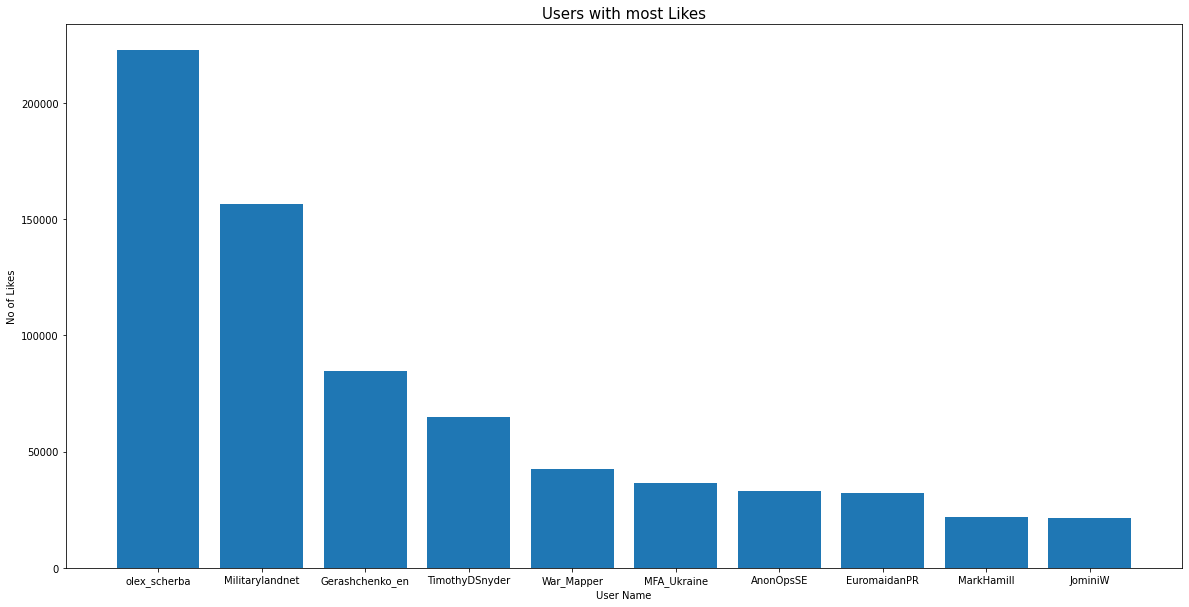

In [ ]:
top_likes = top_likes.sort_values(by='Like Count', ascending=False)

top_likes

usernames = top_likes['Username'].iloc[:10]


like_count = top_likes['Like Count'].iloc[:10]

like_count



plt.figure(figsize=(20, 10))

plt.bar(usernames, like_count)

plt.title('Users with most Likes', fontsize = 15)

plt.xlabel('User Name')

plt.ylabel('No of Likes')

plt.show()

# usernames

### 5. Horizontal Bar Graph - Top 10 Most Active User

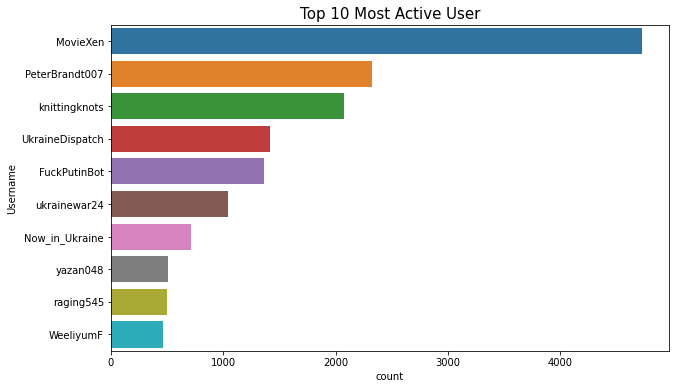

In [ ]:
plt.figure(figsize = (10,6))

sns.countplot(y=Tweet_Final['Username'], order=Tweet_Final['Username'].value_counts().iloc[:10].index)

plt.title('Top 10 Most Active User', fontsize = 15)

plt.show()

## **6. Line Graph: Trend of Tweets Scrapped.**

In [ ]:
Tweets_Final['Datetime'] = pd.to_datetime(Tweets_Final['Datetime'], infer_datetime_format=True)

In [ ]:
Tweets_Final['yyyy'] = Tweets_Final['Datetime'].dt.year

Tweets_Final['mm'] = Tweets_Final['Datetime'].dt.month

Tweets_Final['dd'] = Tweets_Final['Datetime'].dt.day

Tweets_Final.head()

,Datetime,Tweet Id,Text,Username,Like Count,Display Name,Language,Text_Clear,Text_Lower,Text_punctuation,Text_stop,Text_tokenized,Text_lemmatized,yyyy,mm,dd
1,2022-04-24 23:59:04+00:00,1.518380e+18,Please support my mom on YouTube: \nhttps://...,MasterTuxedo,1,AlexInATuxedo,en,Please support my mom on YouTube: \n\n\n#Ukr...,please support my mom on youtube: #ukraine #uk...,please support my mom on youtube ukraine ukrai...,please support my mom on youtube ukrainian ukr...,"[please, support, my, mom, on, youtube, ukrain...","[please, support, my, mom, on, youtube, ukrain...",2022,4,24
2,2022-04-24 23:58:45+00:00,1.518380e+18,Please support my mom on YouTube: \nhttps://...,AlexInATuxedo,2,MyHangoutArea,en,Please support my mom on YouTube: \n\n\n#Ukr...,please support my mom on youtube: #ukraine #uk...,please support my mom on youtube ukraine ukrai...,please support my mom on youtube ukrainian ukr...,"[please, support, my, mom, on, youtube, ukrain...","[please, support, my, mom, on, youtube, ukrain...",2022,4,24
3,2022-04-24 23:56:47+00:00,1.518380e+18,#Dombass: discussion of #Ukraine situation \n#...,pyrrhophytes41,1,Alfred,en,#Dombass: discussion of #Ukraine situation \n#...,#dombass: discussion of #ukraine situation #ru...,dombass discussion of ukraine situation russia...,dombass discussion of situation artillery poun...,"[dombass, discussion, of, situation, artillery...","[dombass, discussion, of, situation, artillery...",2022,4,24
4,2022-04-24 23:56:02+00:00,1.518380e+18,"Ite Pedicabo te ipsum, Putin!\n(Latin)\n\n#Rus...",FuckPutinBot,0,Fuck Putin Bot - #StandWithUkraine 🇺🇦,en,"Ite Pedicabo te ipsum, Putin!\n(Latin)\n\n#Rus...","ite pedicabo te ipsum, putin! (latin) #russiai...",ite pedicabo te ipsum putin latin russiainvade...,ite pedicabo te ipsum putin latin russiainvade...,"[ite, pedicabo, te, ipsum, putin, latin, russi...","[ite, pedicabo, te, ipsum, putin, latin, russi...",2022,4,24
5,2022-04-24 23:55:55+00:00,1.518380e+18,Russia's consolidation and gradual advance sou...,WorldBreakingN9,1,World conflicts Monitoring Center,en,Russia's consolidation and gradual advance sou...,russia's consolidation and gradual advance sou...,russias consolidation and gradual advance sout...,russias consolidation and gradual advance sout...,"[russias, consolidation, and, gradual, advance...","[russia, consolidation, and, gradual, advance,...",2022,4,24


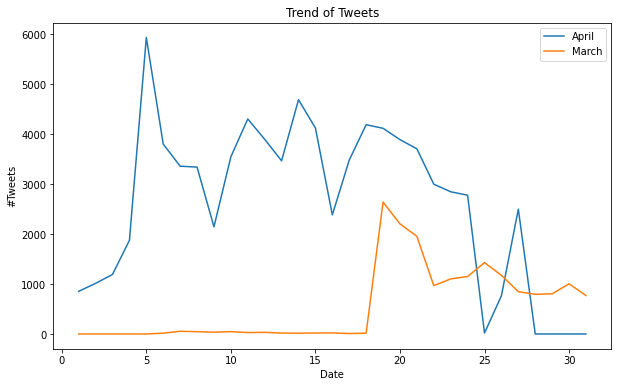

In [ ]:
months = list(Tweets_Final['mm'].unique())

dates = list(range(1,32))

month_dict = {3: 'March', 4: 'April'}



plt.figure(figsize = (10,6))



for i in months:
  tweets = []
  for j in dates:
    tweets_count = len(Tweets_Final[(Tweets_Final['mm'] == i) & (Tweets_Final['dd'] == j)])
    tweets.append(tweets_count)
  plt.plot(dates, tweets, label = month_dict[i])

plt.xlabel('Date')

plt.ylabel('#Tweets')

plt.title('Trend of Tweets')

plt.legend()

plt.show()

## I. **Train test split**

## **We have split the data in train and test set with split ratio as 80:20.**

In [ ]:
# Separating the 80% data for training data and 20% for testing data
X = Tweet_Final["Text_stop"]
y = Tweet_Final["Sentiments"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20)

## **J. Vectorisation**

* Vectorization is a process used to convert the input data from its raw format in numeric form to support the ML Models.
* There are various vectorization techniques – 
1.	Bag of Words
2.	Tf-Idf
3.	Word2Vec
* We have used ‘TF-IDF’ vectorization method to convert the text data in numeric form as it gives the words that occur more frequently in one document and less frequently in other documents and gives more importance to it since it is more useful for classification.


In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit((X_train).values.astype('U'))
print('No. of feature_words: ', len(vectoriser.get_feature_names()))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



No. of feature_words:  500000


In [ ]:
X_train = vectoriser.transform((X_train).values.astype('U'))
X_test  = vectoriser.transform((X_test).values.astype('U'))

## **K. Model Building**

* Further, we split the data in train and test set with split ratio as 80:20.
* Performed 3 classification models namely – Logistic Regression, Decision Tree Classifier and Random Forest Classifier.
* Performed hyperparameter tuning to find the best parameter that gives better model accuracy.


### **Model 1. Logistic Regression**

## Base Model

In [ ]:
LRmodel = LogisticRegression()

LRmodel.fit(X_train, y_train)

y_pred = LRmodel.predict(X_test)


C:\Users\nikit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



## **Logistic Regression Base Model - Confusion Matrix**

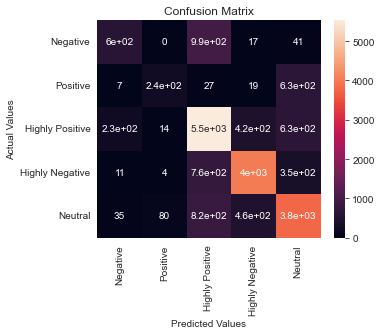

In [ ]:
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,
                     index = ['Negative','Positive','Highly Positive', 'Highly Negative','Neutral'], 
                     columns = ['Negative','Positive','Highly Positive', 'Highly Negative','Neutral'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

## **Logistic Regression Base Model - Classification Report**

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

Highly Negative       0.68      0.37      0.48      1648
Highly Positive       0.71      0.26      0.39       925
       Negative       0.68      0.81      0.74      6824
        Neutral       0.81      0.78      0.80      5125
       Positive       0.70      0.73      0.71      5165

       accuracy                           0.72     19687
      macro avg       0.72      0.59      0.62     19687
   weighted avg       0.72      0.72      0.71     19687



In [ ]:
y_pred

array(['Neutral', 'Positive', 'Neutral', ..., 'Positive', 'Negative',
       'Negative'], dtype=object)

## **Logistics Regression - Hyperparameter Tuning Using Grid Search CV**

In [ ]:
from sklearn.model_selection import GridSearchCV                               # grid search
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

In [ ]:
grid_search = GridSearchCV(LRmodel, space, scoring='accuracy', n_jobs=-1, cv=cv)
grid_result = grid_search.fit(X_train,y_train)

C:\Users\nikit\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [0.73776964 0.72242059        nan        nan        nan 0.08885643
 0.34739984 0.34739984 0.34739984        nan        nan        nan
 0.73776964 0.72242059        nan        nan        nan 0.34739984
 0.34739984 0.34739984 0.34739984        nan        nan        nan
 0.73776964 0.72242059        nan        nan        nan 0.34739984
 0.34739984 0.34739984 0.34739984        nan        nan        nan
 0.73776964 0.72242059        nan        nan        nan 0.34739984
 0.37734463 0.37734887 0.36573328        nan        nan        nan
 0.73776964 0.72242059        nan        nan        nan 0.52520593
 0.58532825 0.58535364 0.5639216         nan        nan        nan
 0.73776964 0.72242059        nan        nan        nan 0.72953211
 0.70424371 0.70285944 0.68870415        nan        nan        nan
 0.73776964 0.72242059        nan        nan        

### **Best Parameters after Hyperparameter tuning:**

In [ ]:
# summarize result
print('Best Score: %s' % grid_result.best_score_)
print('Best Hyperparameters: %s' % grid_result.best_params_)

Best Score: 0.7680064631705982
Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


### **Logistic Regression Model after Hyperparameter Tuning:**

In [ ]:
lrm = LogisticRegression(C = 10, penalty = 'l1', solver = 'liblinear')

lrm.fit(X_train, y_train)

y_predht = lrm.predict(X_test)

### **Logistic Regression Model after Hyperparameter Tuning: Confusion Matrix**

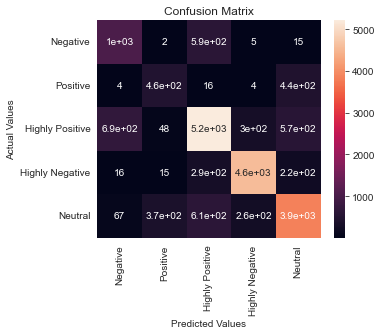

In [ ]:
cm = confusion_matrix(y_test, y_predht)

cm_df = pd.DataFrame(cm,
                     index = ['Negative','Positive','Highly Positive', 'Highly Negative','Neutral'], 
                     columns = ['Negative','Positive','Highly Positive', 'Highly Negative','Neutral'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

### **Logistic Regression Model after Hyperparameter Tuning: Classification Report**

In [ ]:
print(classification_report(y_test, y_predht))

                 precision    recall  f1-score   support

Highly Negative       0.57      0.63      0.60      1648
Highly Positive       0.51      0.50      0.51       925
       Negative       0.78      0.76      0.77      6824
        Neutral       0.89      0.89      0.89      5125
       Positive       0.76      0.75      0.75      5165

       accuracy                           0.77     19687
      macro avg       0.70      0.71      0.70     19687
   weighted avg       0.77      0.77      0.77     19687



### **Model 2. Decision Tree Model**

## Base Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier 

dtmodel = DecisionTreeClassifier()
dtc = dtmodel.fit(X_train,y_train)

y_preddt = dtmodel.predict(X_test)

### **Decision Tree Base Model - Confusion Matrix**

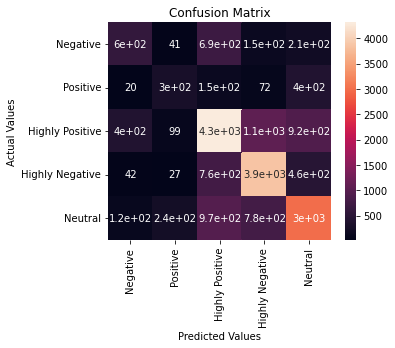

In [ ]:
cm = confusion_matrix(y_test, y_preddt)

cm_df = pd.DataFrame(cm,
                     index = ['Negative','Positive','Highly Positive', 'Highly Negative','Neutral'], 
                     columns = ['Negative','Positive','Highly Positive', 'Highly Negative','Neutral'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

### **Decision Tree Base Model - Classification report**

In [ ]:
print(classification_report(y_test, y_preddt))

                 precision    recall  f1-score   support

Highly Negative       0.51      0.36      0.42      1697
Highly Positive       0.42      0.32      0.36       943
       Negative       0.63      0.63      0.63      6798
        Neutral       0.65      0.75      0.70      5160
       Positive       0.60      0.59      0.59      5094

       accuracy                           0.61     19692
      macro avg       0.56      0.53      0.54     19692
   weighted avg       0.61      0.61      0.61     19692



### **Hyperparameter Tuning of Decision Tree using Random Search CV**

In [ ]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

tree_cv = RandomizedSearchCV(dtmodel, param_dist, cv=2)

# Fit it to the data
tree_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 2}
Best score is 0.3475948035364036


### **Decision Tree Model - Best Parameters after Hyperparameter Tuning**

In [ ]:
dtmodel_cv = DecisionTreeClassifier(criterion = 'entropy', max_depth = None, max_features = 1, min_samples_leaf = 2)
dtmodel_cv.fit(X_train,y_train)

y_preddtcv = dtmodel_cv.predict(X_test)

### **Hyperparameter Tuned Decision Tree Model - Confusion Matrix**

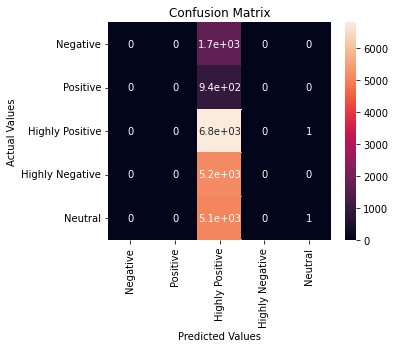

In [ ]:
cm = confusion_matrix(y_test, y_preddtcv)

cm_df = pd.DataFrame(cm,
                     index = ['Negative','Positive','Highly Positive', 'Highly Negative','Neutral'], 
                     columns = ['Negative','Positive','Highly Positive', 'Highly Negative','Neutral'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

### **Hyperparameter Tuned Decision Tree Model - Classification Report**

In [ ]:
print(classification_report(y_test, y_preddtcv))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



                 precision    recall  f1-score   support

Highly Negative       0.00      0.00      0.00      1697
Highly Positive       0.00      0.00      0.00       943
       Negative       0.35      1.00      0.51      6798
        Neutral       0.00      0.00      0.00      5160
       Positive       0.50      0.00      0.00      5094

       accuracy                           0.35     19692
      macro avg       0.17      0.20      0.10     19692
   weighted avg       0.25      0.35      0.18     19692



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### **Hyperparameter of Decision Tree Classifier using Grid Search CV**

In [ ]:
param = {

    "criterion":['gini','entropy'],

    "max_depth":[4,8]}



grid = GridSearchCV(dtmodel, 

                    param_grid= param,

                    cv=2,

                    verbose=1,

                    n_jobs=-1)



grid.fit(X_train, y_train)



# Print the tuned parameters and score

print("Tuned Decision Tree Parameters: {}".format(grid.best_params_))

print("Best score is {}".format(grid.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 8}
Best score is 0.4027321112679638


### **Decision Tree Model - Best Parameters after Hyperparameter Tuning**

In [ ]:
dtmodel_gcv = DecisionTreeClassifier(criterion = 'gini', max_depth = 8)
dtmodel_gcv.fit(X_train,y_train)

y_preddtgcv = dtmodel_gcv.predict(X_test)

### **Hyperparameter Tuned Decision Tree Model - Confusion Matrix**

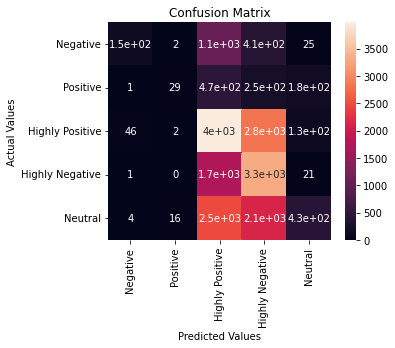

In [ ]:
cm = confusion_matrix(y_test, y_preddtgcv)

cm_df = pd.DataFrame(cm,
                     index = ['Negative','Positive','Highly Positive', 'Highly Negative','Neutral'], 
                     columns = ['Negative','Positive','Highly Positive', 'Highly Negative','Neutral'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

### **Hyperparameter Tuned Decision Tree Model - Classification Report**

In [ ]:
print(classification_report(y_test, y_preddtgcv))

                 precision    recall  f1-score   support

Highly Negative       0.74      0.09      0.16      1656
Highly Positive       0.59      0.03      0.06       924
       Negative       0.41      0.57      0.48      6972
        Neutral       0.37      0.65      0.47      5065
       Positive       0.55      0.08      0.15      5075

       accuracy                           0.40     19692
      macro avg       0.53      0.29      0.26     19692
   weighted avg       0.47      0.40      0.34     19692



## **Model 3. Random forest classifier**
Base Model 



In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rfc=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train,y_train)

y_predrfc = rfc.predict(X_test)


**Random forest classifier - Confusion Matrix**

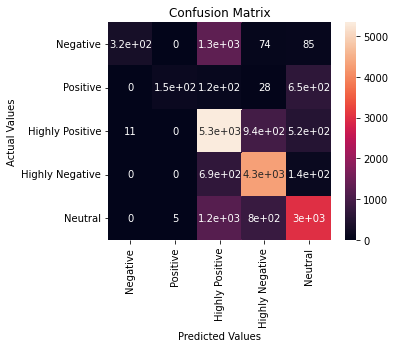

In [ ]:
cm = confusion_matrix(y_test, y_predrfc)

cm_df = pd.DataFrame(cm,
                     index = ['Negative','Positive','Highly Positive', 'Highly Negative','Neutral'], 
                     columns = ['Negative','Positive','Highly Positive', 'Highly Negative','Neutral'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

**Random forest classifier - Classification Report**

In [ ]:
print(classification_report(y_test, y_predrfc))

                 precision    recall  f1-score   support

Highly Negative       0.97      0.18      0.30      1769
Highly Positive       0.97      0.16      0.27       949
       Negative       0.62      0.78      0.69      6815
        Neutral       0.70      0.84      0.76      5138
       Positive       0.68      0.60      0.64      5021

       accuracy                           0.67     19692
      macro avg       0.79      0.51      0.53     19692
   weighted avg       0.70      0.67      0.64     19692



## **Random forest classifier - Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [100,1400]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,450]
# Minimum number of samples required to split a node
min_samples_split = [1,140]
# Minimum number of samples required at each leaf node
min_samples_leaf = [6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [100, 1400], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 450], 'min_samples_split': [1, 140], 'min_samples_leaf': [6, 8], 'criterion': ['entropy', 'gini']}


In [ ]:
rf_randomcv=RandomizedSearchCV(estimator=rfc,param_distributions=random_grid,n_iter=6,cv=2,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


10 fits failed out of a total of 12.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=6,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 450],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [6, 8],
                                        'min_samples_split': [1, 140],
                                        'n_estimators': [100, 1400]},
                   random_state=100, verbose=2)

**Random forest classifier - Best Parameters after Hyperparameter Tuning**

In [ ]:
rf_randomcv.best_params_

{'criterion': 'gini',
 'max_depth': 450,
 'max_features': 'auto',
 'min_samples_leaf': 8,
 'min_samples_split': 140,
 'n_estimators': 1400}

In [ ]:
best_random_grid=rf_randomcv.best_estimator_

**Random forest classifier after Hyperparameter Tuning- Confusion Matrix & Classification Report**

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[   6    0 1680   42   41]
 [   0    9  132   25  783]
 [   0    0 5843  662  310]
 [   0    0 1586 3464   88]
 [   0    0 1999  749 2273]]
Accuracy Score 0.5888177940280317
Classification report:                  precision    recall  f1-score   support

Highly Negative       1.00      0.00      0.01      1769
Highly Positive       1.00      0.01      0.02       949
       Negative       0.52      0.86      0.65      6815
        Neutral       0.70      0.67      0.69      5138
       Positive       0.65      0.45      0.53      5021

       accuracy                           0.59     19692
      macro avg       0.77      0.40      0.38     19692
   weighted avg       0.67      0.59      0.54     19692



In [ ]:
# define grid search
# grid = dict(n_estimators=n_estimators,max_features=max_features)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=rfc, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_train, y_train)

In [ ]:
# summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# **Results & Conclusion**:

* Below are the results of data modeling done using three classification models - Logistic Regression, Decision Tree and Random Forest Classifier.
* After performing hyperparameter tuning, it is evident that the classifcation model using the Logistic regression algorithm is the best model that gives the accuracy score of 77% after hyperparameter tuning.

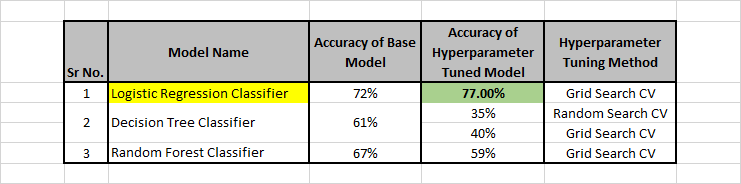

# **References:**

1. https://www.commsights.com/benefits-of-sentiment-analysis-for-businesses/
2. https://www.analyticsvidhya.com/blog/2017/01/ultimate-guide-to-understand-implement-natural-language-processing-codes-in-python/
3.	https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/
4. https://github.com/rashidesai24/Analyzing-Twitter-Trends-On-COVID-19-Vaccinations

The dataset used for this notebook was scrapped by us from Twitter Platform using different hasgtags and further concatenated as shown above.


Copyright 2022 

Nikita Gaurihar
Ronak Patil
Anshuman Karan
Aishwarya Ghaytadak

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.